<a href="https://colab.research.google.com/github/nshaganti/nshaganti-regression-discontinuity-design-lp/blob/main/Analysis_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/manning-lp/nshaganti-regression-discontinuity-design-lp.git

Cloning into 'nshaganti-regression-discontinuity-design-lp'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 0), reused 9 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 304.92 KiB | 1.11 MiB/s, done.


In [ ]:
import os
repo = 'nshaganti-regression-discontinuity-design-lp'
if os.getcwd().split("/")[-1] == repo:
  print("Already in the correct directory")
else:
  os.chdir(repo)
  print(f"Changed working directory to: {repo}")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.formula.api as smf
import graphviz as gr

warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

Changed working directory to: nshaganti-regression-discontinuity-design-lp


In [ ]:
data = pd.read_csv("rdd_data.csv")

In [ ]:
data.shape

(10000, 43)

In [ ]:
data.head()

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,spend_5m_clothes,spend_6m_clothes,spend_1m_health,spend_2m_health,spend_3m_health,spend_4m_health,spend_5m_health,spend_6m_health,spend_1m_pet,spend_2m_pet,spend_3m_pet,spend_4m_pet,spend_5m_pet,spend_6m_pet,spend_1m_groceries,spend_2m_groceries,spend_3m_groceries,spend_4m_groceries,spend_5m_groceries,spend_6m_groceries,spend_1m_eletronic,spend_2m_eletronic,spend_3m_eletronic,spend_4m_eletronic,spend_5m_eletronic,spend_6m_eletronic,sales,discount,profit,age,gender,cust_state,tenure
0,5,0,0,0,10,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,55,180,20.000000,10.000000,15.0,40.0,0,0,0,0.0,0.0,0.0,1442.30,$ 4.0,66.93,30,0.0,MA,19
1,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0.000000,0.000000,0.0,0.0,0,0,0,0.0,0.0,0.0,883.96,$ 2.0,41.33,30,1.0,MG,20
2,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,25,10,254.255197,289.255197,65.0,30.0,0,0,0,0.0,0.0,0.0,4900.67,$ 224.0,15.88,29,0.0,RJ,21
3,0,0,0,0,0,0.0,25,25.0,0.0,25.0,25.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,30,10,5.000000,30.000000,0.0,45.0,0,0,0,0.0,0.0,0.0,1547.48,$ 1.0,74.99,36,1.0,BA,18
4,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,40,0,0.000000,10.000000,0.0,45.0,0,0,0,0.0,0.0,0.0,1335.23,$ 13.0,52.41,37,0.0,PB,19


In [ ]:
# understand the inferred data types
data.dtypes

,0
spend_1m_baby,int64
spend_2m_baby,int64
spend_3m_baby,int64
spend_4m_baby,int64
spend_5m_baby,int64
spend_6m_baby,float64
spend_1m_clothes,int64
spend_2m_clothes,float64
spend_3m_clothes,float64
spend_4m_clothes,float64


In [ ]:
# parse the discount
data["discount"] = (data["discount"].str.split(" ").str[-1]).astype(float)

In [ ]:
# check for any missing data
data.isna().sum()

,0
spend_1m_baby,0
spend_2m_baby,0
spend_3m_baby,0
spend_4m_baby,0
spend_5m_baby,0
spend_6m_baby,0
spend_1m_clothes,0
spend_2m_clothes,0
spend_3m_clothes,0
spend_4m_clothes,0


In [ ]:
data["profits"] = 0.05 * data["sales"] - data["discount"]

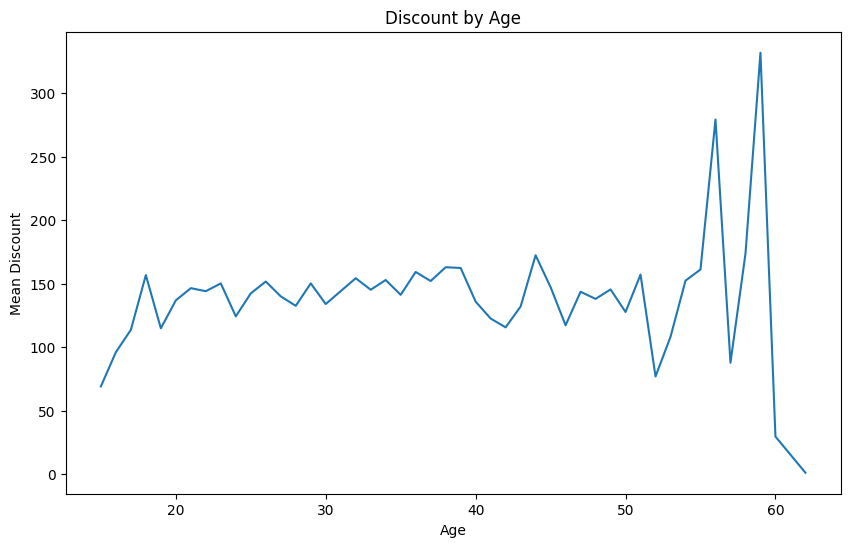

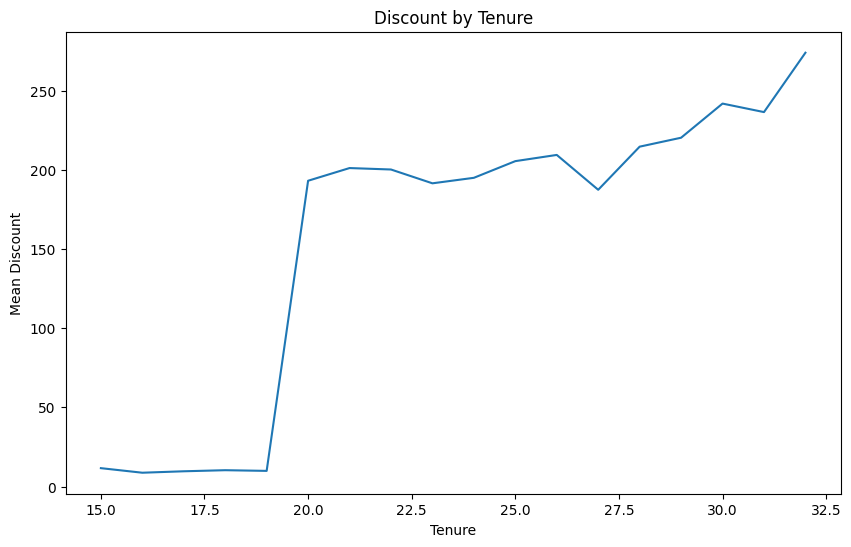

In [ ]:
# Group by age and calculate the mean discount
age_discount = data.groupby('age')['discount'].mean().reset_index()

# Plot age vs. discount
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='discount', data=age_discount)
plt.title('Discount by Age')
plt.xlabel('Age')
plt.ylabel('Mean Discount')
plt.show()

# Check for discontinuity visually - look for sharp jumps or changes in the slope.

# Group by tenure and calculate the mean discount
tenure_discount = data.groupby('tenure')['discount'].mean().reset_index()

# Plot tenure vs. discount
plt.figure(figsize=(10, 6))
sns.lineplot(x='tenure', y='discount', data=tenure_discount)
plt.title('Discount by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Mean Discount')
plt.show()

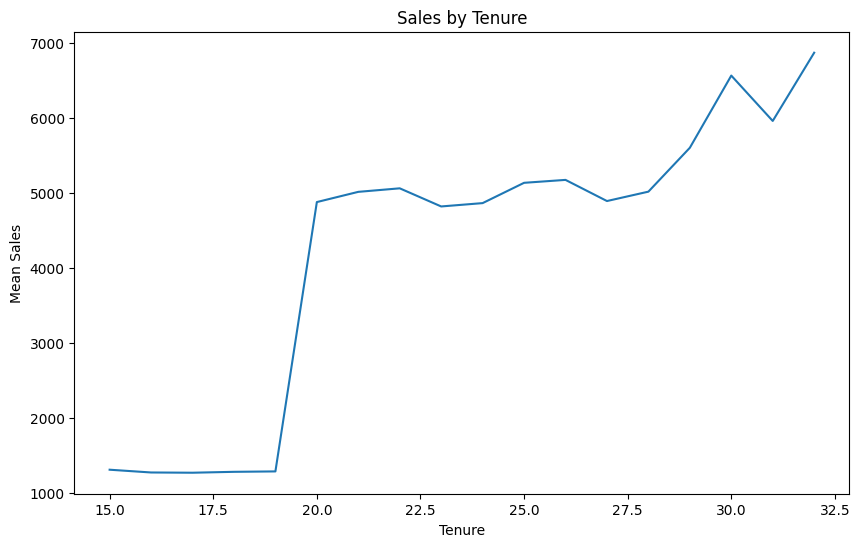

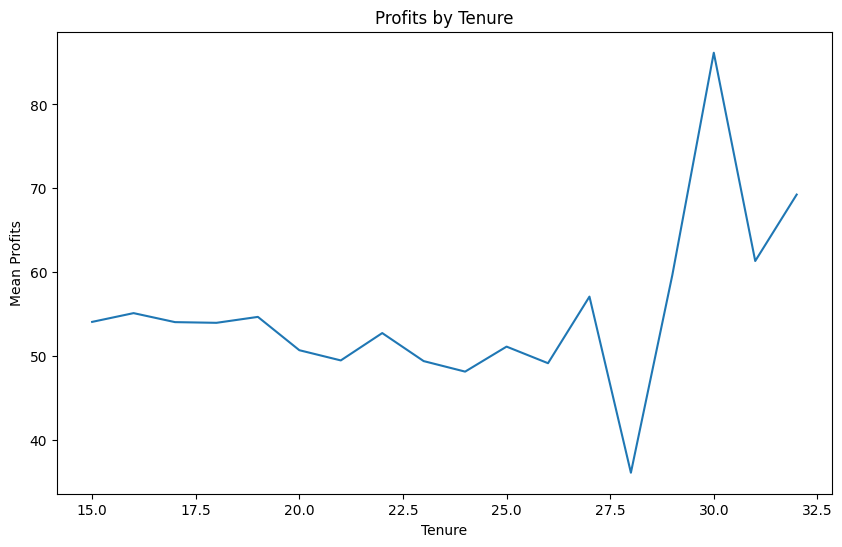

In [ ]:
# Aggregate the dataframe by tenure and aggregate sales with the mean.
tenure_sales = data.groupby('tenure')['sales'].mean().reset_index()

# Plot sales on the y-axis and tenure on the x-axis.
plt.figure(figsize=(10, 6))
sns.lineplot(x='tenure', y='sales', data=tenure_sales)
plt.title('Sales by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Mean Sales')
plt.show()

# Does the discontinuity in discount translate to a discontinuity in sales?
# Visually inspect the plot.  A discontinuity in sales around the same tenure value as the discount discontinuity suggests a relationship.


# Repeat the procedure above replacing sales with profits.
tenure_profits = data.groupby('tenure')['profits'].mean().reset_index()

# Plot profits on the y-axis and tenure on the x-axis.
plt.figure(figsize=(10, 6))
sns.lineplot(x='tenure', y='profits', data=tenure_profits)
plt.title('Profits by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Mean Profits')
plt.show()

# Does the discontinuity in discount translate to a discontinuity in profits?
# Visually inspect the plot. A discontinuity in profits around the same tenure value as the discount discontinuity suggests a relationship.

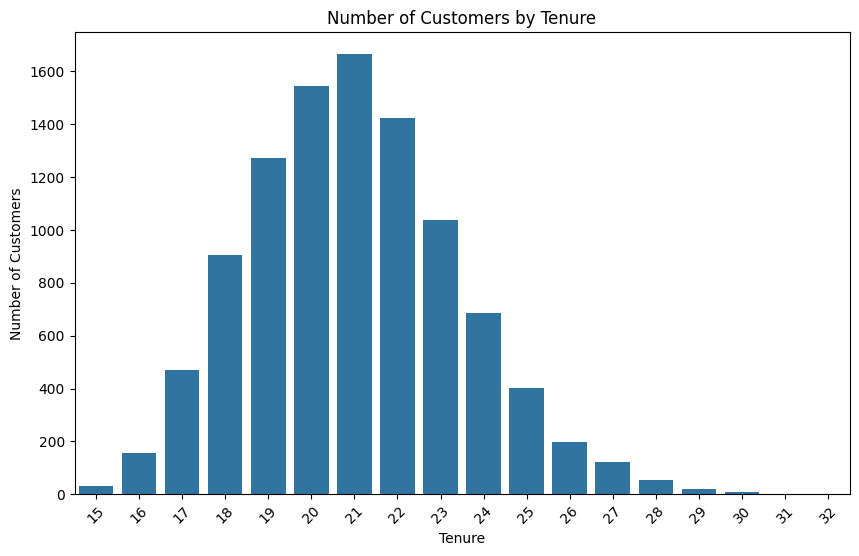

In [ ]:
# Group data by tenure and count customers
tenure_counts = data.groupby('tenure').size().reset_index(name='customer_count')

# Plot tenure vs. customer count
plt.figure(figsize=(10, 6))
sns.barplot(x='tenure', y='customer_count', data=tenure_counts)
plt.title('Number of Customers by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Check for bunching visually - look for unusually high counts at specific tenure values
#  A sudden increase or decrease in customer counts might suggest bunching.
#  Examine the plot to see if any tenure points have significantly more customers than their neighbors.